In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy().dropna(subset = "salary_year_avg")
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,"[excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint']}"
410,Data Analyst,IT Business Lead Data Analyst - VP - Hybrid,"Atlantic Beach, FL",via ComputerJobs.com,Full-time,False,Georgia,2023-01-10 13:59:02,False,False,United States,year,133285.0,NaN,Citi,"[sql, word, excel, visio, powerpoint, sharepoint]","{'analyst_tools': ['word', 'excel', 'visio', '..."
988,Data Analyst,DATA ANALYST (ONSITE),"Springfield, MA",via Indeed,Full-time,False,"New York, United States",2023-11-21 13:00:13,False,False,United States,year,62623.0,NaN,Springfield Public Schools,"[sql, excel, tableau]","{'analyst_tools': ['excel', 'tableau'], 'progr..."
1413,Data Analyst,Junior BI Developer,"Atlanta, GA",via Ai-Jobs.net,Full-time,False,Georgia,2023-10-31 13:57:41,False,True,United States,year,71300.0,NaN,Guidehouse,"[sql, excel, power bi]","{'analyst_tools': ['excel', 'power bi'], 'prog..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782637,Data Analyst,Data Integration Analyst,"Germantown, WI",via ZipRecruiter,Full-time,False,"Illinois, United States",2023-01-20 06:18:43,True,False,United States,year,70000.0,NaN,Virtual Benefits Administrator,"[vba, sql, sql server]","{'databases': ['sql server'], 'programming': [..."
782798,Data Analyst,Reference Data Analyst,"New York, NY",via Ai-Jobs.net,Full-time,False,"New York, United States",2023-04-21 05:59:51,True,False,United States,year,111175.0,NaN,DRW,[terminal],{'other': ['terminal']}
783588,Data Analyst,Data Analytics Manager,"Chicago, IL",via Ladders,Full-time,False,"Illinois, United States",2023-01-09 06:01:18,False,False,United States,year,125000.0,NaN,"United Air Lines, Inc","[sql, r, python, hadoop, excel]","{'analyst_tools': ['excel'], 'libraries': ['ha..."
783866,Data Analyst,Lead Credit Bureau Data Analyst,"Des Plaines, IL",via Ladders,Full-time,False,"Illinois, United States",2023-06-02 06:02:06,False,True,United States,year,115000.0,NaN,Discover Financial Services,[unix],{'os': ['unix']}


In [3]:
df_DA_US = df_DA_US.explode("job_skills")

df_DA_US[["salary_year_avg", "job_skills"]]

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel
...,...,...
784882,87500.0,sql
784882,87500.0,vba
784882,87500.0,tableau
784882,87500.0,excel


In [4]:
df_DA_US_group = df_DA_US.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])
df_DA_US_group

,count,median
job_skills,,
airflow,44,116250.00
airtable,5,90000.00
alteryx,106,106281.25
angular,8,107500.00
ansible,1,159640.00
...,...,...
wire,4,74250.00
word,461,81194.75
workfront,3,75000.00


In [5]:
df_DA_US_top_pay = df_DA_US_group.sort_values(by = "median", ascending = False).head(10)

df_DA_US_skills = df_DA_US_group.sort_values(by = "count", ascending = False).head(10).sort_values(by = "median", ascending = False).head(10)


In [6]:
df_DA_US_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [7]:
df_DA_US_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


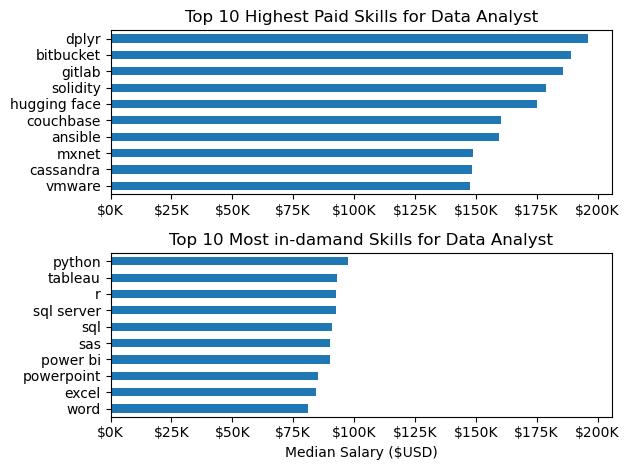

In [8]:
fig, ax = plt.subplots(2, 1)

df_DA_US_top_pay.plot(kind = "barh", y = "median", ax = ax[0], legend = False)
ax[0].invert_yaxis()                # one way to invert the Y-axis
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f"${int(x/1000)}K"))

df_DA_US_skills[::-1].plot(kind = "barh", y = "median", ax = ax[1], legend = False)             # another way of invert the Y-axis by reversing the whole DataFrame

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Most in-damand Skills for Data Analyst")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ($USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f"${int(x/1000)}K"))

plt.tight_layout()

Barchart using Seaborn

In [9]:
import seaborn as sns

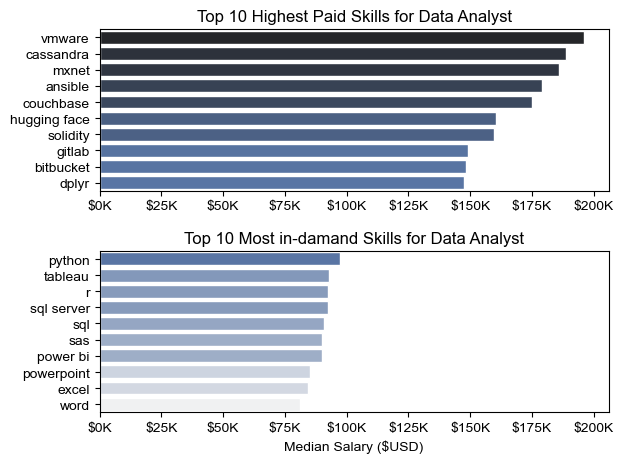

In [10]:
fig, ax = plt.subplots(2, 1)
sns.set_theme(style = "ticks")

sns.barplot(df_DA_US_top_pay[::-1], x = "median", y = df_DA_US_top_pay.index, ax = ax[0], hue = "median", palette = "dark:b_r")
ax[0].legend().remove()

# df_DA_US_top_pay.plot(kind = "barh", y = "median", ax = ax[0], legend = False)
ax[0].invert_yaxis()                # one way to invert the Y-axis
ax[0].set_title("Top 10 Highest Paid Skills for Data Analyst")
ax[0].set_xlabel("")
ax[0].set_ylabel("")
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f"${int(x/1000)}K"))





sns.barplot(df_DA_US_skills, x = "median", y = df_DA_US_skills.index, ax = ax[1], hue = "median", palette = "light:b")
ax[1].legend().remove()

# df_DA_US_skills[::-1].plot(kind = "barh", y = "median", ax = ax[1], legend = False)             # another way of invert the Y-axis by reversing the whole DataFrame

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title("Top 10 Most in-damand Skills for Data Analyst")
ax[1].set_ylabel("")
ax[1].set_xlabel("Median Salary ($USD)")
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f"${int(x/1000)}K"))

plt.tight_layout()

Histogram and Density Plot using Seaborn

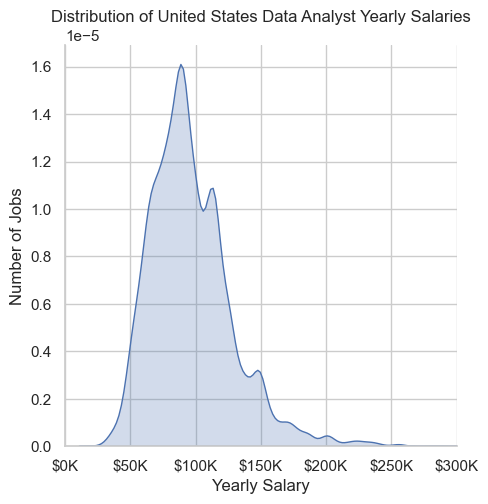

In [11]:
sns.set_theme(style = "whitegrid")
sns.displot(df_DA_US["salary_year_avg"], kind = "kde", fill = True)
# df_DA_US["salary_year_avg"].plot(kind = "hist", bins = 30, edgecolor = "black")
plt.xlim(0,300000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))
plt.title("Distribution of United States Data Analyst Yearly Salaries")
plt.xlabel("Yearly Salary")
plt.ylabel("Number of Jobs")
plt.show()

BoxPlot using Seaborn

C:\Users\ABS\AppData\Local\Temp\ipykernel_12384\178256313.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


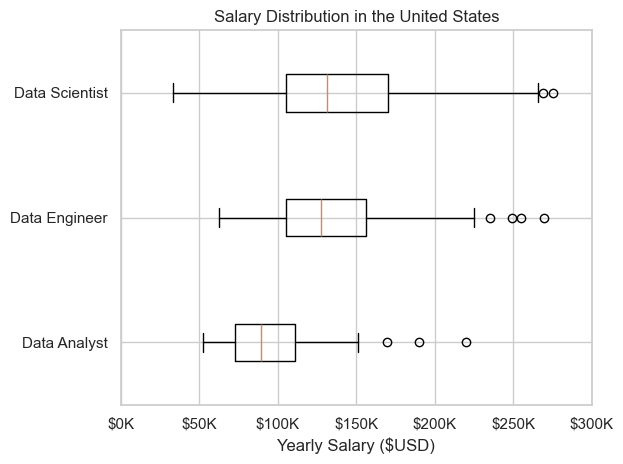

In [12]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]

# filter for the job titles and country

df_US1 = df[(df["job_title_short"].isin(job_titles)) & (df["job_location"] == "United States")].copy().dropna(subset = "salary_year_avg")

job_list = [df_US1[df_US1["job_title_short"] == job_title]["salary_year_avg"] for job_title in job_titles]


plt.boxplot(job_list, labels = job_titles, vert = False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
plt.xlim(0, 300000)
plt.tight_layout()
plt.show()

C:\Users\ABS\AppData\Local\Temp\ipykernel_12384\1164314424.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_US1, x = "salary_year_avg", y = "job_title_short", palette="pastel")


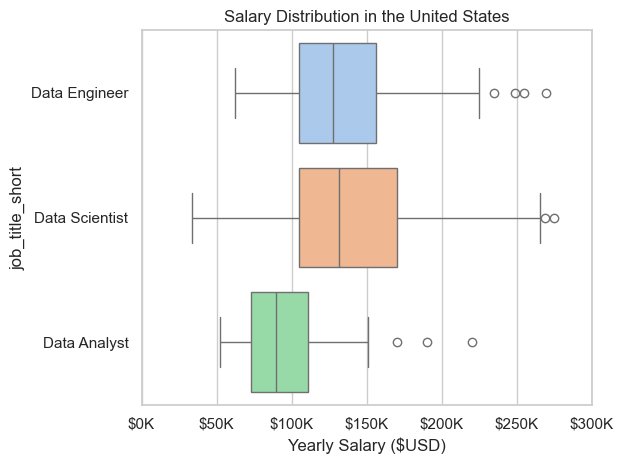

In [16]:
sns.boxplot(data = df_US1, x = "salary_year_avg", y = "job_title_short", palette="pastel")

# plt.boxplot(job_list, labels = job_titles, vert = False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"${int(x/1000)}K"))
plt.title("Salary Distribution in the United States")
plt.xlabel("Yearly Salary ($USD)")
plt.xlim(0, 300000)
plt.tight_layout()
plt.show()